## **Test Cricket - How bad were England between 1994 and 2003?**

### **Introduction - Why this question?**

A recent [ESPNCricinfo article](http://www.espncricinfo.com/story/_/id/24128428/dale-steyn-greatest-fast-bowler-century "ESPNCricinfo Dale Steyn article") debating Dale Steyn's place in the fast bowlers pantheon caught my attention.  Not for the mass of stats thrown out to prove the writers point that Dale could well be the Greatest Of All Time (though there were indeed a lot of stats thrown), but for a line dismissing the acheivements of Glenn McGrath, his closest modern day rival for that title.  The full quote, with the offending line in bold:
>'ESPNcricinfo's jury panel recently voted in McGrath as the right-arm quick in our Test team of the last 25 years, but given the above numbers, I would replace McGrath with Steyn, owing not only to Steyn's prowess on the toughest continent for quicks, but also because of the value he adds via his strike rate. **A full fifth of McGrath's wickets had also come against minnows, by which of course I mean England 1994 through 2003.**'

The line may well be intentionally provocative or just tongue in cheek, but it got me thinking, how bad _were_ England in this era? Lets take a closer look.   

### **Methodology**

ESPNCricinfo has an excellent searchable archive engine called Statsguru, from which I ran the appropriate searches to get our raw data.  I've created a very similar function to that in my PGA Putting Analysis blog post, where the URL's of these search results can be inputted into the function and a dataframe is returned.  The resulting dataframes will then be merged and cleaned for analysis.

In [1]:
#Import required modules
import requests
from bs4 import BeautifulSoup as soup
import pandas as pd

In [2]:
#Function
def statsguru_url_to_df(url):
    """Turn a statsguru stats page url into a DataFrame"""
    #Package the request, send request, catch response: r
    r = requests.get(url)
    #Extract the response as HTML: html_doc
    html_doc = r.text
    #Create our Beautiful Soup object from the HTML: main_soup
    main_soup = soup(html_doc, 'lxml')
    
    #Find our table in the soup. There are a number of tables in the soup and unfortunately they dont have distinguishable attributes
    all_tables = main_soup.find_all('table')
    
    #It turns out our required table is the 3rd in the list. NOTE - not robust if site changes format of the page in future
    stat_table = all_tables[2]
    #Find elements in the 'body' of the table
    stat_table_body = stat_table.find('tbody')
    
    #Initialize an empty array
    stat_data = []
    
    #Filter for the rows in the table body
    rows = stat_table_body('tr')
    for match in rows:
        #select all cells in the row
        cols = match.find_all('td')
        #Strip out empty values
        cols = [ele.text.strip() for ele in cols]
        #Append data to our array
        stat_data.append([ele for ele in cols if ele])
        
    #Sort the table header, using same process as above for the table body
    stat_table_header = stat_table.find('thead')
    stat_header = []
    hrows = stat_table_header('tr')
    for header in hrows:
        cols = header.find_all('th')
        cols = [ele.text.strip() for ele in cols]
        #Append data to our array
        stat_header.append([ele for ele in cols if ele])

    #Create our header array
    stat_col_labels = stat_header[0]
    
    #Return a DataFrame of the data
    return pd.DataFrame(stat_data, columns=stat_col_labels)

Lets use this function by inputting the URL's from our Statsguru search results, then merge the resulting DataFrames.

In [3]:
#Use our function to get Englands results v all teams 1994-2003    
url_1 = 'http://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;filter=advanced;orderby=start;size=200;spanmax1=01+Jan+2003;spanmin1=01+Jan+1994;spanval1=span;template=results;type=team;view=results'
all_results_df_1 = statsguru_url_to_df(url_1)
url_2 = 'http://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;filter=advanced;orderby=start;page=2;size=200;spanmax1=01+Jan+2003;spanmin1=01+Jan+1994;spanval1=span;template=results;type=team;view=results'
all_results_df_2 = statsguru_url_to_df(url_2)
url_3 = 'http://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;filter=advanced;orderby=start;page=3;size=200;spanmax1=01+Jan+2003;spanmin1=01+Jan+1994;spanval1=span;template=results;type=team;view=results'
all_results_df_3 = statsguru_url_to_df(url_3)
url_4 = 'http://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;filter=advanced;orderby=start;page=4;size=200;spanmax1=01+Jan+2003;spanmin1=01+Jan+1994;spanval1=span;template=results;type=team;view=results'
all_results_df_4 = statsguru_url_to_df(url_4)

#Concatenate these 4 DFs into a single DF
all_results = [all_results_df_1, all_results_df_2, all_results_df_3, all_results_df_4]
all_results_df = pd.concat(all_results)
print(all_results_df.head())
print(all_results_df.shape)
print(all_results_df.info())

           Team Result           Margin  Toss  Bat      Opposition     Ground  \
0  South Africa    won           5 runs   won  1st     v Australia     Sydney   
1     Australia   lost           5 runs  lost  2nd  v South Africa     Sydney   
2         India    won  inns & 119 runs   won  1st     v Sri Lanka    Lucknow   
3     Sri Lanka   lost  inns & 119 runs  lost  2nd         v India    Lucknow   
4         India    won   inns & 95 runs   won  1st     v Sri Lanka  Bengaluru   

    Start Date  
0   2 Jan 1994  
1   2 Jan 1994  
2  18 Jan 1994  
3  18 Jan 1994  
4  26 Jan 1994  
(794, 8)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 794 entries, 0 to 193
Data columns (total 8 columns):
Team          794 non-null object
Result        794 non-null object
Margin        794 non-null object
Toss          794 non-null object
Bat           794 non-null object
Opposition    794 non-null object
Ground        794 non-null object
Start Date    794 non-null object
dtypes: object(8)
memory u

Now I'll clean up the DataFrame so it contains the required data in a meaningful form.

In [4]:
#Select our required columns
all_results_df = all_results_df.loc[:, ('Team', 'Result')]
print(all_results_df.head())

#Reshape the data. First sort results into relevant groups
all_grouped = all_results_df.groupby(['Team'])['Result'].value_counts()
print(all_grouped)

#Turn this into a dataframe by unstacking our groupby object
all_group_df = all_grouped.unstack()
print(all_group_df)

#Note - we have a hierarchical index here
#Lets deal with our NaN values. 'aban' and 'canc' matches can be disregarded for this analysis. Just for practice we will deal with them using .dropna()
all_cleanish_group_df = all_group_df.dropna(axis ='columns', thresh=5)

#Bangladesh didnt win a test in the period, so this NaN needs replacing as 0
all_cleaner_group_df = all_cleanish_group_df.fillna(0)

#We will convert to integers from floating point values as in this case it makes sense, you cant win a fraction a match.
all_final_df = all_cleaner_group_df.astype('int64')
print(all_final_df)

#Lets put it into ratios. We'll start by adding a total matches column
all_final_df['Total'] = all_final_df['draw'] + all_final_df['lost'] + all_final_df['won']

#Then create the ratio columns
all_final_df['draw_rate'] = all_final_df['draw'] / all_final_df['Total']
all_final_df['loss_rate'] = all_final_df['lost'] / all_final_df['Total']
all_final_df['win_rate'] = all_final_df['won'] / all_final_df['Total']
print(all_final_df)

           Team Result
0  South Africa    won
1     Australia   lost
2         India    won
3     Sri Lanka   lost
4         India    won
Team          Result
Australia     won       62
              lost      22
              draw      17
Bangladesh    lost      16
              draw       1
England       lost      41
              draw      36
              won       30
India         draw      29
              lost      26
              won       25
              aban       1
New Zealand   lost      29
              draw      28
              won       22
              aban       1
              canc       1
Pakistan      won       35
              lost      27
              draw      20
              canc       2
              aban       1
South Africa  won       45
              draw      25
              lost      20
Sri Lanka     lost      29
              won       28
              draw      22
              canc       1
West Indies   lost      41
              won       28
    

### **Analysis**

Now we have our cleaned up DataFrame lets do some simple empirical data analysis (EDA) and look at some descriptive stats.

In [5]:
#Summary stats
print(all_final_df.describe())

Result       draw      lost        won       Total  draw_rate  loss_rate  \
count   10.000000  10.00000  10.000000   10.000000  10.000000  10.000000   
mean    22.200000  28.20000  28.200000   78.600000   0.268357   0.412819   
std      9.235198   8.14862  17.535995   25.556908   0.095198   0.207861   
min      1.000000  16.00000   0.000000   17.000000   0.058824   0.217822   
25%     20.000000  23.00000  22.750000   79.000000   0.247443   0.326067   
50%     23.000000  28.00000  28.000000   81.000000   0.278129   0.367089   
75%     27.250000  30.50000  33.750000   92.250000   0.342733   0.426440   
max     36.000000  41.00000  62.000000  107.000000   0.362500   0.941176   

Result   win_rate  
count   10.000000  
mean     0.318824  
std      0.175490  
min      0.000000  
25%      0.278954  
50%      0.306788  
75%      0.408730  
max      0.613861  


England have a mean win rate of 0.280, which is slightly worse than the overall mean (0.319) and median (0.307) win rates. Their loss rate of 0.383 (a lower number here is better) is slightly worse than the median loss rate (0.367), but better than the mean loss rate (0.413), though Bangladesh do skew the means somewhat as they had just started playing test cricket and were on the whole very uncompetitive.

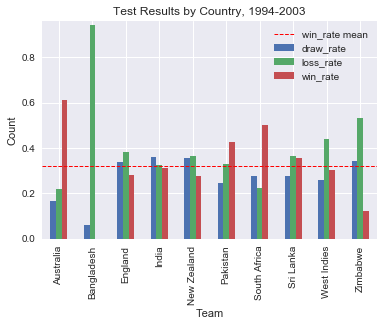

In [6]:
#Lets do some graphical EDA.
import matplotlib.pyplot as plt
import seaborn as sns

#Set Seaborn as default
sns.set()

#Create a bar plot
all_final_df.plot(y=['draw_rate', 'loss_rate', 'win_rate'], kind='bar')
#Add a line for the mean win rate of the data
plt.axhline(y=all_final_df['win_rate'].mean(), color='red', linewidth=1, label='win_rate mean', linestyle='--')
plt.xlabel('Team')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.title('Test Results by Country, 1994-2003')
plt.margins(0.02)
plt.show()

### **Thoughts**

We can see clearly that Australia have by far the largest win rate, twice that of the mean, while the limitations of Bangladesh during the era are also obvious.  

Australia, South Africa, Pakistan and Sri Lanka clearly have better records than England, as do India though to a lesser extent. England look to have a roughly similar record to New Zealand and the West Indies. They are only obviously better than Zimbabwe and Bangladesh.  Does this make them minnows during the period? Probably not, though they were certainly a sub par team.

But is this the whole story? 

### **More Thoughts**

During this period England played Australia (as we've seen, clearly the best team in the world at the time) 25 times, nearly a quarter of all their matches.  Thats more than any other team played Australia.  Also England played no tests at all against Bangladesh who didn't win a single game out of the 17 they played in this era.  What if we repeated the analysis removing all results involving Australia and Bangladesh, in a crude effort to equalize the difficulty of the schedules? Lets do that now.

In [7]:
#Use our function to get all non-Australia/Bangladesh results 1994-2003    
urls_1 = 'http://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;filter=advanced;opposition=1;opposition=3;opposition=4;opposition=5;opposition=6;opposition=7;opposition=8;opposition=9;orderby=start;size=200;spanmax1=01+Jan+2003;spanmin1=01+Jan+1994;spanval1=span;team=1;team=3;team=4;team=5;team=6;team=7;team=8;team=9;template=results;type=team;view=results;wrappertype=print'
filter_results_df_1 = statsguru_url_to_df(urls_1)
urls_2 = 'http://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;filter=advanced;opposition=1;opposition=3;opposition=4;opposition=5;opposition=6;opposition=7;opposition=8;opposition=9;orderby=start;page=2;size=200;spanmax1=01+Jan+2003;spanmin1=01+Jan+1994;spanval1=span;team=1;team=3;team=4;team=5;team=6;team=7;team=8;team=9;template=results;type=team;view=results;wrappertype=print'
filter_results_df_2 = statsguru_url_to_df(urls_2)
urls_3 = 'http://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;filter=advanced;opposition=1;opposition=3;opposition=4;opposition=5;opposition=6;opposition=7;opposition=8;opposition=9;orderby=start;page=3;size=200;spanmax1=01+Jan+2003;spanmin1=01+Jan+1994;spanval1=span;team=1;team=3;team=4;team=5;team=6;team=7;team=8;team=9;template=results;type=team;view=results;wrappertype=print'
filter_results_df_3 = statsguru_url_to_df(urls_3)

#Concatenate these 3 DFs into a single DF
filter_results  = [filter_results_df_1, filter_results_df_2, filter_results_df_3]
filter_results_df = pd.concat(filter_results)
print(filter_results_df.head())
print(filter_results_df.shape)
print(filter_results_df.info())

        Team Result           Margin  Toss  Bat   Opposition     Ground  \
0      India    won  inns & 119 runs   won  1st  v Sri Lanka    Lucknow   
1  Sri Lanka   lost  inns & 119 runs  lost  2nd      v India    Lucknow   
2      India    won   inns & 95 runs   won  1st  v Sri Lanka  Bengaluru   
3  Sri Lanka   lost   inns & 95 runs  lost  2nd      v India  Bengaluru   
4      India    won   inns & 17 runs  lost  2nd  v Sri Lanka  Ahmedabad   

    Start Date  
0  18 Jan 1994  
1  18 Jan 1994  
2  26 Jan 1994  
3  26 Jan 1994  
4   8 Feb 1994  
(558, 8)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 558 entries, 0 to 157
Data columns (total 8 columns):
Team          558 non-null object
Result        558 non-null object
Margin        558 non-null object
Toss          558 non-null object
Bat           558 non-null object
Opposition    558 non-null object
Ground        558 non-null object
Start Date    558 non-null object
dtypes: object(8)
memory usage: 39.2+ KB
None


Now to clean the data.

In [8]:
#Select our required columns
filter_results_df = filter_results_df.loc[:, ('Team', 'Result')]
print(filter_results_df.head())

#Reshape the data. First sort results into relevant groups
filter_grouped = filter_results_df.groupby(['Team'])['Result'].value_counts()
print(filter_grouped)

#Turn this into a dataframe by unstacking our groupby object
filter_group_df = filter_grouped.unstack()
print(filter_group_df)

#Note - we have a hierarchical index here
#Lets deal with our NaN values. 'aban' and 'canc' matches can be disregarded for this analysis. Just for practice we will deal with them using .dropna()
filter_cleanish_group_df = filter_group_df.dropna(axis ='columns', thresh=5)

#Bangladesh didnt win a test in the period, so this NaN needs replacing as 0
filter_cleaner_group_df = filter_cleanish_group_df.fillna(0)

#Convert to integers from floating point values as in this case it makes sense, you cant win half a match.
filter_final_df = filter_cleaner_group_df.astype('int64')
print(filter_final_df)

#Lets put it into ratios. We'll start by adding a total matches column
filter_final_df['Total'] = filter_final_df['draw'] + filter_final_df['lost'] + filter_final_df['won']

#Then create the ratio columns
filter_final_df['draw_rate'] = filter_final_df['draw'] / filter_final_df['Total']
filter_final_df['loss_rate'] = filter_final_df['lost'] / filter_final_df['Total']
filter_final_df['win_rate'] = filter_final_df['won'] / filter_final_df['Total']
print(filter_final_df)

        Team Result
0      India    won
1  Sri Lanka   lost
2      India    won
3  Sri Lanka   lost
4      India    won
Team          Result
England       draw      33
              won       25
              lost      24
India         draw      29
              lost      21
              won       19
              aban       1
New Zealand   draw      24
              lost      24
              won       20
              aban       1
              canc       1
Pakistan      won       30
              lost      18
              draw      16
              canc       2
              aban       1
South Africa  won       39
              draw      22
              lost      10
Sri Lanka     lost      26
              won       24
              draw      20
              canc       1
West Indies   lost      29
              draw      23
              won       21
Zimbabwe      lost      30
              draw      19
              won        4
              aban       1
Name: Result, dtype: i

### **New Analysis**

So what does this new analysis show?

In [9]:
#Summary stats
print(filter_final_df.describe())

Result       draw       lost        won     Total  draw_rate  loss_rate  \
count    8.000000   8.000000   8.000000   8.00000   8.000000   8.000000   
mean    23.250000  22.750000  22.750000  68.75000   0.336850   0.338349   
std      5.496752   6.475228   9.996428   8.20714   0.057758   0.120789   
min     16.000000  10.000000   4.000000  53.00000   0.250000   0.140845   
25%     19.750000  20.250000  19.750000  67.00000   0.303823   0.289825   
50%     22.500000  24.000000  22.500000  69.50000   0.334005   0.328645   
75%     25.250000  26.750000  26.250000  71.50000   0.369478   0.377886   
max     33.000000  30.000000  39.000000  82.00000   0.420290   0.566038   

Result  win_rate  
count   8.000000  
mean    0.324800  
std     0.140800  
min     0.075472  
25%     0.284594  
50%     0.299498  
75%     0.374330  
max     0.549296  


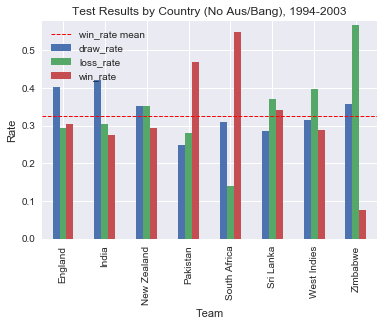

In [10]:
#Our new bar plot
filter_final_df.plot(y=['draw_rate', 'loss_rate', 'win_rate'], kind='bar')
#Add a line for the mean win rate of the data
plt.axhline(y=filter_final_df['win_rate'].mean(), color='red', linewidth=1, label='win_rate mean', linestyle='--')
plt.xlabel('Team')
plt.ylabel('Rate')
plt.title('Test Results by Country (No Aus/Bang), 1994-2003')
plt.legend(loc='upper left')
plt.margins(0.02)
plt.show()

South Africa, Pakistan and Sri Lanka hold records better than the mean win rate (0.324). England have a win rate of 0.305, worse than the mean, but superior to the win rates of India, New Zealand, West Indies and Zimbabwe.

Englands loss rate of 0.293 is better than every other teams bar South Africa and Pakistan.

### **Conclusion**

It looks as though England's record suffered to some extent during the period by having to play a great team like Australia more than everyone else, while at the same time not having any matches against a genuine minnow, Bangladesh.  With all matches against these two teams filtered out:
   - Englands win rate improved slightly from 0.280 to 0.304
   - their loss rate improved greatly from 0.383 to 0.293

Indeed if you were to rank the teams in this second analysis you could certainly make the case that England would be fourth out of eight, not exactly minnow like results.  Perhaps Glenn McGraths 157 wickets against England shouldnt be dismissed as irrelevant just yet!